<a href="https://colab.research.google.com/github/Machocho254/HYpothyrodism-Prediction/blob/master/Hypothyrodism_Week8_IP_MS_CORE_JANUARY_2020_MACHOCHO_MENGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAIROBI HOSPITAL HYPOTHYRODISM CLINICAL CAMP**

# **BUSINESS UNDERSTANDING**

a) **DEFINITION OF THE QUESTION**

The Nairobi Hospital conducted a clinic camp to test for hypothyrodism. As a data scientist I have been tasked with creating a model that will determine whether or not the patient's symptoms indicate that the patient has hypothyroidism from the provided data. 

**WHAT IS HYPOTHYRODISM**

Hypothyrodism is a condition where the body produces too little thyroxine. Low thyroxine levels cause problems with development if it occurs when an individual is young. In adults, thyroxine deficiency will lower the metabolic rate, causing weight gain, memory problems, infertility, fatigue, and muscle stiffness.



**Thyroxine**: is a hormone secreted in the thyroid glands into the bloodstream. It plays a crucial role in heart and digestive function, metabolism, brain development, bone health, and muscle control. It affects almost all of the body's systems, which means proper thyroxine levels are vital for health.

b) **DEFINITION OF THE METRIC OF SUCCESS**

c) **UNDERSTANDING THE CONTEXT**

d) **DATA RELEVANCE**

# **DATA UNDERSTANDING**

## **Data Reading**

Loading the data onto the notebook using pandas

In [0]:
# importing the needed libraries
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
# loading the data onto the notebook
# 
thyroid = pd.read_csv('/content/hypothyroid.csv')


In [0]:
# previewing the first observations of the dataset
# 
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [0]:
# previewing the last observations of the dataset
# 
thyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [0]:
# to get the number of rows and columns in the dataset
# 
thyroid.shape

# the data has 26 columns and 3163 rows

(3163, 26)

In [0]:
# to get the information about the data

thyroid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

There are variables that should be intergers. The datatypes will be changed to intergers for the exploratory data analysis. 

In [0]:
# to check whether the data has any missiing values
# 
thyroid.isnull().sum()

# the data does not have any missing values 

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
# data description 
# 
thyroid.describe().T

# from the output, it is evident that the data has some missing data as there are instances where the entry is ?
# we have to find a way to identify the entries with ? and see whether we drop them or using the fill

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


In [0]:
# to check for duplicates in the data
# 
thyroid.duplicated().any()

True

In [0]:
# Remove duplicates
# Keep every first data point of the duplicated datapoints
#
thyroid.drop_duplicates(keep='first', inplace = True)

# Check to confirm whether duplicates have been dropped
#
thyroid.duplicated().any()

False

##### **UNIQUE VALUES**

In [0]:
# checking for the unique values of the dataframe
# using a for loop  to print unique values for each column
#
for column in thyroid.columns:
  print(column)
  print(df[column].nunique())
  print(df[column].unique())
  print('\n')

status
1
[0]


age
92
[72. 15. 24. 77. 85. 64. 20. 42. 69. 75. 53. 59. 68. 50. 78. 65. 28. 43.
 40. 84. nan 83. 63. 73. 36. 27. 48. 71. 60. 34. 79. 62. 74. 32. 41. 70.
 29.  5. 58. 35. 51. 22. 16. 44. 39. 47. 18. 17. 88. 56. 30. 45. 66. 52.
 54. 80. 33. 38. 92. 67. 46. 13. 89. 61. 49. 26. 57. 31. 90. 81. 25. 37.
 76. 87. 23. 55. 86. 98. 21. 97.  1.  6. 14. 82. 11. 19.  9. 12. 10.  8.
  7.  4. 93.]


sex
2
['M' 'F' nan]


on_thyroxine
2
[0 1]


query_on_thyroxine
2
[0 1]


on_antithyroid_medication
2
[0 1]


thyroid_surgery
2
[0 1]


query_hypothyroid
2
[0 1]


query_hyperthyroid
2
[0 1]


pregnant
2
[0 1]


sick
2
[0 1]


tumor
2
[0 1]


lithium
2
[0 1]


goitre
2
[0 1]


TSH_measured
2
['y' 'n']


TSH
239
[3.00e+01 1.45e+02 0.00e+00 4.30e+02 7.30e+00 1.38e+02 7.70e+00 2.10e+01
 9.20e+01 4.80e+01 3.60e+01 1.50e+01 1.53e+01 2.50e+01 6.10e+01 2.80e+01
 1.70e+02 5.40e+01 2.16e+02 5.60e+01 7.10e+01 4.60e+01 7.00e+01 3.40e+01
 5.30e+01 9.40e+00 1.26e+02 1.00e+01 5.30e+02 3.50e+01 6.50e+01 5

# 3.0 **DATA PREPARATION**

##  3.1 **DATA CLEANING**

In [0]:
# replace all the question marks with a null value
# 
df = thyroid.replace("?", np.nan)

In [0]:
# to check the datatypes of the columns of the df
# 
df.dtypes

# there are columns who's datatypes will have to be changed.
# numerical, categorical data and boolean

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [0]:
# Changing column datatypes to their appriopriate datatypes
# creating lists for: numerial, categorical and boolean columns


num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

cat_cols = ['status', 'sex','TSH_measured', 'T3_measured', 'TT4_measured',\
            'T4U_measured', 'FTI_measured', 'TBG_measured']

bool_cols = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',\
            'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

# Replacing bool columns with True or False value
#
for column in bool_cols:
  df[column] = df[column].replace('f', False)
  df[column] = df[column].replace('t', True)
  
# Using a for loop to change columns to their appriopriate datatypes
#
for column in df.columns:
  if column in num_cols:
    df[column] = df[column].astype('float')
  elif column in cat_cols:
    df[column] = df[column].astype('category')
  elif column in bool_cols:
    df[column] = df[column].astype('bool')
  
# Previewing the column datatypes to check whether the changes have been effected
#
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                            object
dtype: objec

In [0]:
# statistical description of the new df 
# 
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2648.000000,2631.000000,2406.000000,2846.000000,2847.000000,2848.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,19.275099,24.023192,0.979488,44.606704,0.225796,60.147649
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,67.000000,2.200000,2.300000,127.000000,1.060000,129.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [0]:
# checking for missing data
# 
df.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [0]:
# for the sex columns, we fill the missing values with the mode
# for the numerical columns we fill the missing values with the mean
# we drop TBG_Measured and TBG columns as theY have a lot of missing values


df.drop(['TBG', 'TBG_measured'], axis = 1, inplace = True)

# dealing with missing values in the sex column
df.sex.fillna(df.sex.mode()[0], inplace = True)

# A for for loop is used for to avoid repetition
#
for column in num_cols:
  df[column].fillna(df[column].mean(), inplace = True)
  
# Checking whether the above has worked. 
#
df.isnull().sum().any()

False

In [0]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


#### **OUTLIERS MANAGEMENT**

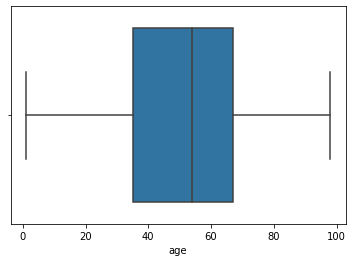

In [0]:
sb.boxplot(x=df['age'])

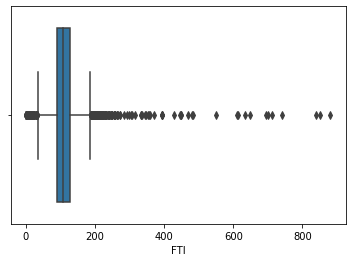

In [0]:
sb.boxplot(x=df['FTI'])

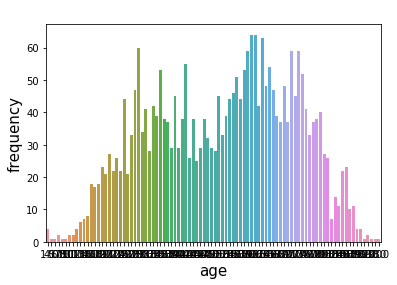

In [0]:
# using box plots to check for outliers
# sb.boxplot(x=outliers.df['age'])

sb.countplot('age',data = df)
plt.xlabel("age",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.title("Frequency of Age",fontsize=16,color="white")
plt.show()

In [0]:
# getting the data types of the columns to +9

## 3.2 **EXPLORATORY DATA ANALYSIS**

### **Univariate Analysis**

#### **STATUS**

In [0]:
# to preview dataset
# 
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


#### **AGE**

In [0]:
df.age.nunique()
# There are 92 unique values 
df.age.unique()

array([72., 15., 24., 77., 85., 64., 20., 42., 69., 75., 53., 59., 68.,
       50., 78., 65., 28., 43., 40., 84., nan, 83., 63., 73., 36., 27.,
       48., 71., 60., 34., 79., 62., 74., 32., 41., 70., 29.,  5., 58.,
       35., 51., 22., 16., 44., 39., 47., 18., 17., 88., 56., 30., 45.,
       66., 52., 54., 80., 33., 38., 92., 67., 46., 13., 89., 61., 49.,
       26., 57., 31., 90., 81., 25., 37., 76., 87., 23., 55., 86., 98.,
       21., 97.,  1.,  6., 14., 82., 11., 19.,  9., 12., 10.,  8.,  7.,
        4., 93.])

In [0]:
# description of the variable
# 
df['age'].describe()

count    2717.000000
mean       51.154214
std        19.294405
min         1.000000
25%        35.000000
50%        54.000000
75%        67.000000
max        98.000000
Name: age, dtype: float64

In [0]:
# maximum  and minimum  age 
# 
print("The maximum value of the Age variable is: ", df['age'].max())
print("The minimum value of the Age variable is:", df['age'].min())

The maximum value of the Age variable is:  98.0
The minimum value of the Age variable is: 1.0


<function matplotlib.pyplot.show>

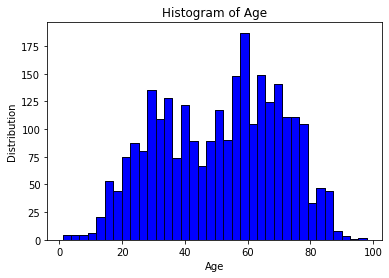

In [0]:
# visualizing the distribution of age 

# matplotlib histogram
plt.hist(df['age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sb.distplot(df['age'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show

# age is almost normally distributed

In [0]:
# checking the correlation of the variables
corr = df[['status', 'age', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI']].corr()
corr 

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
age,1.000000,0.000451,-0.019781,-0.059541,-0.012432,0.043156,-0.087005,-0.157715,0.063078,-0.063738,-0.021559,-0.036387,-0.007352,-0.265743,-0.086317,-0.188786,0.017737
on_thyroxine,0.000451,1.000000,-0.013574,-0.024418,0.031370,0.066144,-0.086734,0.001219,-0.063480,-0.022658,-0.010467,-0.025874,-0.005257,0.023279,0.217276,0.071209,0.113350
query_on_thyroxine,-0.019781,-0.013574,1.000000,-0.015823,0.015876,-0.020206,-0.038674,-0.019129,-0.024267,0.049524,-0.003430,0.004078,-0.014676,-0.015133,-0.020294,-0.034741,-0.004659
on_antithyroid_medication,-0.059541,-0.024418,-0.015823,1.000000,-0.006256,-0.033724,0.124440,0.003412,-0.021160,-0.013461,-0.002991,-0.021048,-0.001045,0.065626,-0.002745,0.026479,-0.017797
thyroid_surgery,-0.012432,0.031370,0.015876,-0.006256,1.000000,0.001065,0.021470,-0.013427,-0.033475,-0.021294,-0.004732,-0.022904,0.012167,-0.007012,-0.016127,0.026078,-0.026105
query_hypothyroid,0.043156,0.066144,-0.020206,-0.033724,0.001065,1.000000,-0.017942,-0.014439,-0.051720,-0.032900,0.040694,-0.023296,0.066911,-0.038984,-0.010955,0.044393,-0.046271
query_hyperthyroid,-0.087005,-0.086734,-0.038674,0.124440,0.021470,-0.017942,1.000000,0.073329,-0.051720,-0.032900,-0.007311,0.040038,-0.022910,0.169325,0.131093,0.070024,0.063286
pregnant,-0.157715,0.001219,-0.019129,0.003412,-0.013427,-0.014439,0.073329,1.000000,-0.025581,0.004308,-0.003616,0.081827,-0.012415,0.201960,0.171237,0.323329,-0.005415
sick,0.063078,-0.063480,-0.024267,-0.021160,-0.033475,-0.051720,-0.051720,-0.025581,1.000000,-0.020644,-0.004588,-0.032279,-0.006218,-0.103268,-0.042154,-0.047710,-0.023498
tumor,-0.063738,-0.022658,0.049524,-0.013461,-0.021294,-0.032900,-0.032900,0.004308,-0.020644,1.000000,-0.002918,-0.020534,-0.019244,0.026472,-0.014707,0.024743,-0.026980


#### **SEX**

In [0]:
df.sex.nunique()
# there are 2 unique values 

2

In [0]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


### **BIVARIATE ANALYSIS**

# **MODELLING**

In [0]:
# importing all the necessary libaries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings

### **BASELINE MODEL**

In [0]:
# Selecting the independent variables and the target variable
#
X = df.drop('status', axis = 1)
y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



In [0]:


# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9881209503239741


The model accuracy for the baseline model is .988.

### **Random Forest Approach**

In [0]:
# Random forest approach
# Import the model
from sklearn.ensemble import RandomForestClassifier


# Instantiating the model
#
RFC = RandomForestClassifier(random_state = 0)
RFC.fit(X_train, y_train)

# Making predictions
#
y_pred = RFC.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)


The accuracy score is: 0.990280777537797 and the f1 score is 0.8799999999999999


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.92      0.85      0.88        39

    accuracy                           0.99       926
   macro avg       0.95      0.92      0.94       926
weighted avg       0.99      0.99      0.99       926



array([[884,   3],
       [  6,  33]])

In [0]:
# Checking for the most important features 
# create a df of the features and their importance
# in ascending order
#
important_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(RFC.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_df

,importance
feature,
FTI,0.3039
TSH,0.2379
TT4,0.2246
T3,0.0786
T4U,0.0479
age,0.0427
query_hypothyroid,0.0100
on_antithyroid_medication,0.0097
TSH_measured_n,0.0060


From the given df, it is evident that the FTI column is the most important feature followed by the TSH feature.

We could visualize the output above in a barchart. 

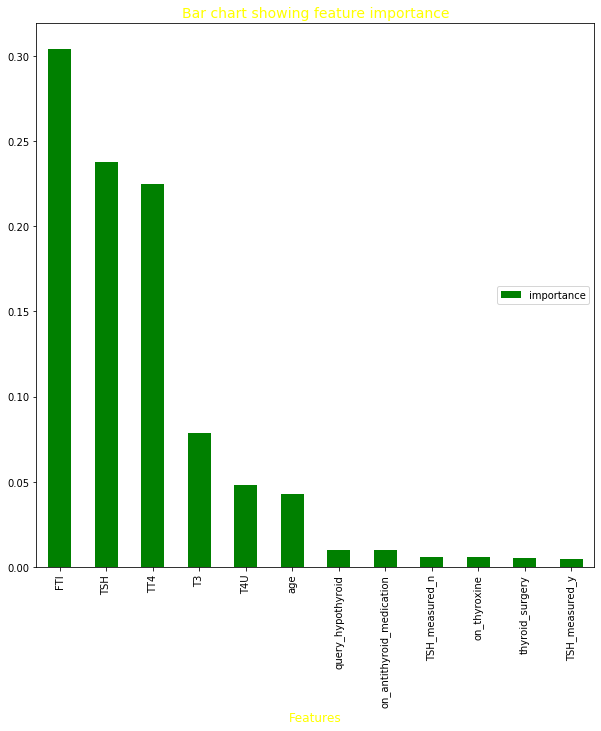

In [0]:
# Creating a bar chart of feature importance in descending order
#
important_df = impo_df[:12].sort_values(by = 'importance', ascending = False)
important_df.plot(kind = 'bar', figsize = (10, 10), color = 'green')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'yellow', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'yellow')
plt.show()

As shown above, the most important features are:
FTI, TSH, TT4, T3, T4U and Age. 

####  *Remodeling using just the Important features*

In [0]:
# Selecting the independent variables and the target variable
#
X = X[['age', 'on_thyroxine', 'sex_F', 'sex_M', 'TSH_measured_y',
        'thyroid_surgery', 'sick', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TSH_measured_n']]
y = np.where(df.status == 'hypothyroid', 1, 0)


# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# instanting the model
RFC = RandomForestClassifier(random_state = 0)
RFC.fit(X_train, y_train)

# Making predictions
#
y_pred = RFC.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)



The accuracy score is: 0.9935205183585313 and the f1 score is 0.9210526315789475


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.95      0.90      0.92        39

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  4,  35]])

The F1 score has gotten better in the model using just the important features. 

#### **ADABOOST APPROACH**

In [0]:
# Selecting the independent variables and the target variable
#
X = df.drop('status', axis = 1)
y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ABC = AdaBoostClassifier(random_state = 0)
ABC.fit(X_train, y_train)

# Making predictions
#
y_pred = ABC.predict(X_test)

# Measuring the accuracy of the model
#
acc_1 = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

print(f'The accuracy score is: {acc_1} and the f1 score is {f1_1}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9935205183585313 and the f1 score is 0.9210526315789475


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.95      0.90      0.92        39

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  4,  35]])

In [0]:
# df to show the most important features in the model
# in descending order
imp_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(ABC.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
imp_df

,importance
feature,
FTI,0.22
age,0.16
TSH,0.16
T4U,0.12
T3,0.12
TT4,0.12
on_antithyroid_medication,0.04
query_hypothyroid,0.02
thyroid_surgery,0.02


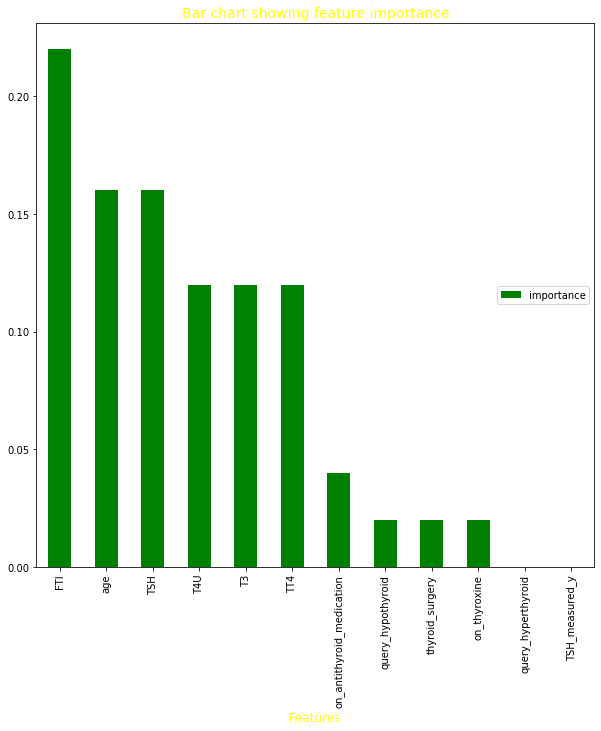

In [0]:
# VISUALIIZNG THE OUTPUT ABOVE

imp_df = imp_df[:12].sort_values(by = 'importance', ascending = False)
imp_df.plot(kind = 'bar', figsize = (10, 10), color = 'green')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'yellow', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'yellow')
plt.show()

In [0]:
# remodelling using the most important features
# Selecting the independent variables and the target variable
#
X = X[['age', 'on_thyroxine', 'thyroid_surgery', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]

y = np.where(df.status == 'hypothyroid', 1, 0)


# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# instanting the model
ABC = AdaBoostClassifier(random_state = 0)
ABC.fit(X_train, y_train)
# Making predictions
#
y_pred = ABC.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)



The accuracy score is: 0.990280777537797 and the f1 score is 0.8831168831168831


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.89      0.87      0.88        39

    accuracy                           0.99       926
   macro avg       0.94      0.93      0.94       926
weighted avg       0.99      0.99      0.99       926



array([[883,   4],
       [  5,  34]])

### **SUPPORT VECTOR MACHINE APPROACH**

From the above 2 models, it is clear that the two most important features are TSH and FTI. We will use these two features in this approach to create the algorithmn. 

In [0]:
# getting the values for x and y
X = df[['FTI', 'TSH']].values
y = np.where(df.status == 'hypothyroid', 1, 0)

# laoding and creating a list of models 
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']

def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9838012958963283 and the f1 score is: 0.7692307692307693
The accuracy score of Linear     is: 0.9859611231101512 and the f1 score is: 0.8169014084507042
The accuracy score of Rbf        is: 0.9848812095032398 and the f1 score is: 0.7941176470588235


The linear SVM is the most accurate with an F1 score of 0.81. 